Equipment : R&S RTP084, 20 GHz Photodetector

In [ ]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import pandas as pd
import glob
import natsort

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from RSRTxReadBin import RTxReadBin

/var/folders/hg/n17fww195g9887twwb23k9k40000gn/T/ipykernel_78776/4264559579.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [ ]:
# Preparing the data according to notes.
path = 'data-sets/data-set-10'
ds10_files = natsort.natsorted(glob.glob(path+ '/*.Wfm.bin'))

# Array of current supplied in sequence of ds9_files
ds9_mA = np.array([0,0,0.202,0.304,0.35,0.36,0.375,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.485,0.5252,0.635,0.76,0.825,0.97,1.14,1.439,1.715,1.900,1.902,1.902,1.902])

# Offsets for sensitivty of 2mV/div
offset_y, offset_x, offset_S = RTxReadBin('data-sets/data-set-10/RefCurve_2022-02-16_10_174148.Wfm.bin')
offset = np.average(offset_y)

'''
# Creating new data-frame with all data
ds9_corrected = pd.DataFrame()

j = 0

for i,j in zip(ds9_files, range(0,len(ds9_files),1)): 
    ds9_corrected.insert(j,ds9_mA[j],(pd.read_csv(i)))
    j += 1

# Subtracting relevant offsets
'''


'\n# Creating new data-frame with all data\nds9_corrected = pd.DataFrame()\n\nj = 0\n\nfor i,j in zip(ds9_files, range(0,len(ds9_files),1)): \n    ds9_corrected.insert(j,ds9_mA[j],(pd.read_csv(i)))\n    j += 1\n\n# Subtracting relevant offsets\n'

In [ ]:
import natsort
import glob
from RSRTxReadBin import RTxReadBin
from scipy import stats

# Preparing the data according to notes.
path = 'data-sets/data-set-10/'
ds11_files = natsort.natsorted(glob.glob(path+ '/*.Wfm.bin'))

# Offsets for sensitivty of 2mV/div
offset_y, offset_x, offset_S = RTxReadBin(ds11_files[0])
offset = np.average(offset_y)

ds9_mA = np.array([0,0.1,0.2,0.302,0.351,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.479,0.51,0.548,0.55,0.6,0.713,0.9,0.901,1.203,1.5,1.752,1.923])

avgs, stds, skews, kurts = np.array([]), np.array([]), np.array([]), np.array([])

def ds11_stats(file):
    y, x, S = RTxReadBin(file)
    y -= offset
    avg = np.average(y)
    std = np.std(y)
    skew = stats.skew(y)
    kurt = stats.kurtosis(y)
    return avg, std, skew, kurt

for file in ds11_files:
    avg, std, skew, kurt = ds11_stats(file)
    avgs = np.append(avgs, avg)
    stds = np.append(avgs, std)
    skews = np.append(skews, skew)
    kurts = np.append(kurts, kurt)


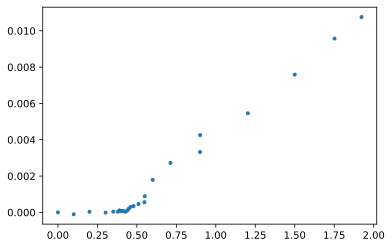

In [ ]:
plt.plot(ds9_mA, avgs[0:26], '.')

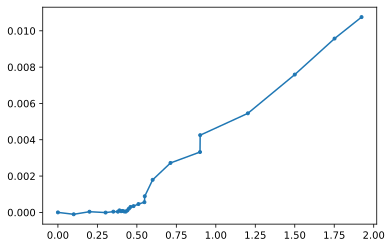

In [ ]:
plt.plot(ds9_mA,stds[0:26], '.-')

In [1]:
plt.plot(stds[10:29]/avgs, '.-')

NameError: name 'plt' is not defined

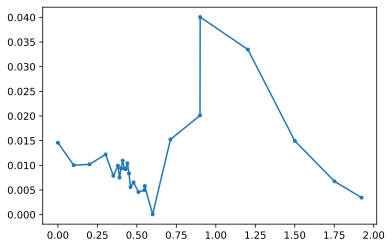

In [ ]:
plt.plot(ds9_mA, skews[0:26], '.-')

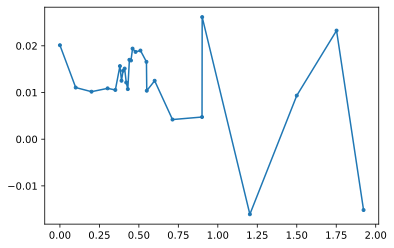

In [ ]:
plt.plot(ds9_mA, kurts[0:26], '.-')

/var/folders/hg/n17fww195g9887twwb23k9k40000gn/T/ipykernel_78776/3268898723.py:2: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(ds9_mA,1/np.sqrt(avgs[0:26]), '.-')


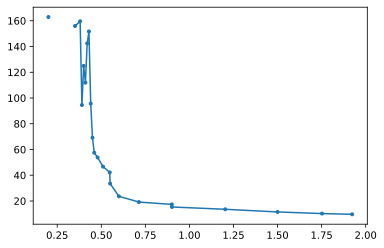

In [ ]:
# realtive noise 
plt.plot(ds9_mA,1/np.sqrt(avgs[0:26]), '.-')

-9.9452875e-05


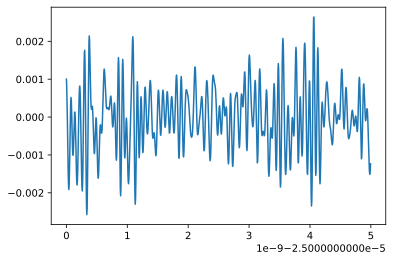

In [ ]:
print(offset)

plt.plot(offset_x[0:1000],offset_y.flat[0:1000])

In [ ]:
offset_S

{'SourceType': 'eRS_SIGNAL_SOURCE_TYPE_SOURCE',
 'Resolution': 5e-12,
 'RecordLength': 10000000.0,
 'HWRecordLength': 10000000.0,
 'TriggerOffset': 0.0,
 'RescaleCenterTime': 0.0,
 'DecimationMode': 'eRS_DECIMATION_MODE_SAMPLE',
 'TraceArithmetics': 'eRS_TRACE_ARITHMETICS_SINGLE',
 'TraceType': 'eRS_TRACE_TYPE_NORMAL',
 'BaseUnit': 'eRS_UNIT_LEVEL_V',
 'BaseUnitRelative': 'eRS_ONOFF_OFF',
 'Impedance': 50.0,
 'XStart': -2.5e-05,
 'XStop': 2.5e-05,
 'SignalRecordLength': 10000000.0,
 'HardwareXStart': -2.5000275e-05,
 'HardwareXStop': 2.50003e-05,
 'SignalHardwareRecordLength': 10000115.0,
 'AdjustedResolutionBW': 0.0,
 'NoiseBandwidth': 0.0,
 'InterleavedTraceCount': 1.0,
 'ValueType': 'eRS_SIGNAL_VALUE_TYPE_COMPLETELY_FINITE_DEFINED',
 'NofQuantisationLevels': 64768.0,
 'DecimationFactor': 1.0,
 'TOADone': 'eRS_ONOFF_ON',
 'ISO_TRG': 0.0,
 'SC_POST': 0.0,
 'SC_TRG': 0.0,
 'SignalResolution': 5e-12,
 'LeadingSettlingSamples': 55.0,
 'TimeScale': 5e-06,
 'ReferencePoint': 50.0,
 'Rescal